In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Clustering
Scikit-learn includes numerous functions that can be used to cluster data. The documentation includes many examples, see: [https://scikit-learn.org/stable/auto_examples/index.html#clustering](https://scikit-learn.org/stable/auto_examples/index.html#clustering)


## MeanShift 

Let us start by looking at using the MeanShift algorithm. 

In [2]:
from sklearn.cluster import MeanShift, estimate_bandwidth

We will start by generating some random points, each bit centered around: (1.5,1.5), (-1.5, 3.25) and (-0.5, -2.25). 

Let us visualize each of these sets

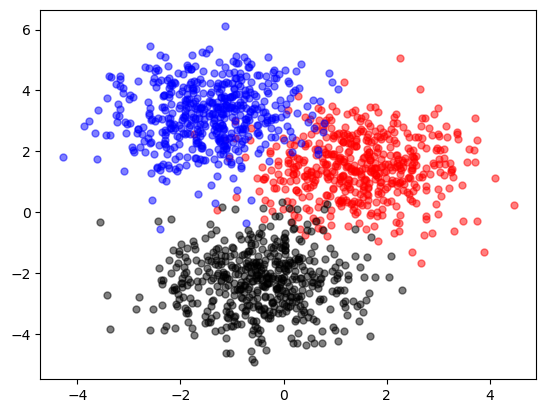

In [3]:
np.random.seed(123)

n_points = 500
x0 =  np.random.randn(n_points)+1.5
y0 =  np.random.randn(n_points)+1.5

x1 =  np.random.randn(n_points)-1.5
y1 =  np.random.randn(n_points)+3.25


x2 =  np.random.randn(n_points)-0.5
y2 =  np.random.randn(n_points)-2.25


plt.scatter(x0,y0, marker='.', c='red', s=100, alpha=0.5)
plt.scatter(x1,y1, marker='.', c='blue', s=100, alpha=0.5)
plt.scatter(x2,y2, marker='.', c='black', s=100, alpha=0.5)

Let us merge all of these points together into a single numpy array xy, with shape (1500,2).

In [4]:
x_all = np.concatenate((x0,x1,x2))
y_all = np.concatenate((y0,y1,y2))
xy = np.stack((x_all,y_all),axis=1)
xy.shape

(1500, 2)

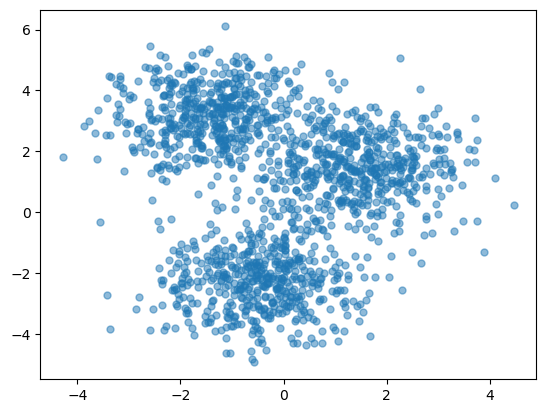

In [5]:
plt.scatter(xy[:,0], xy[:,1], marker='.', s=100, alpha=0.5)

To cluster this data with meanshift, we need to know the bandwidth of the data used the convolution to get the kernal density.  Scikit_learn has a function to estimate this (see this [link](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.estimate_bandwidth.html#sklearn.cluster.estimate_bandwidth) for more info).   

In [6]:
bandwidth = estimate_bandwidth(xy)
print(bandwidth)

2.3923511276884946


In [7]:
clustering = MeanShift(bandwidth=bandwidth).fit(xy)
clustering.fit(xy)
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters)


number of estimated clusters : 2


We know we started with 3 clusters, and this only is detecting 2.  Let us do a quickly visualize the data and we can see that the clusters being detected are roughly at the intersection between clusters, rather than the centers.  

0.23570639974343244 2.163222831263786
0.42383576953724894 -0.3619306287855685


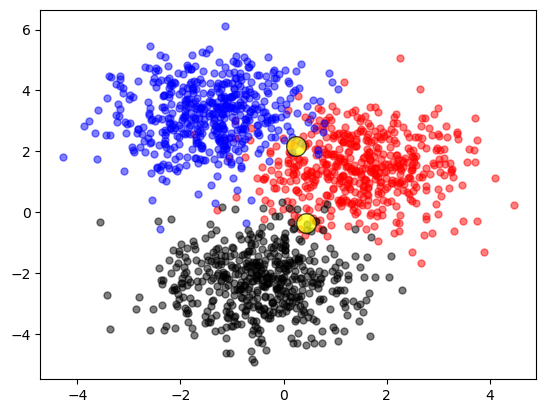

In [8]:
plt.scatter(x0,y0, marker='.', c='red', s=100, alpha=0.5)
plt.scatter(x1,y1, marker='.', c='blue', s=100, alpha=0.5)
plt.scatter(x2,y2, marker='.', c='black', s=100, alpha=0.5)
for cluster in cluster_centers:
    plt.scatter(cluster[0], cluster[1], s=200, marker='o', c='yellow', edgecolors= "black", alpha=0.7)
    print(cluster[0], cluster[1])

Let us try reducing the quantile.  By default the quantile value is 0.3, which for our data seems too larger.  This results in a rather significant reduction in the bandwidth value.

In [9]:
bandwidth = estimate_bandwidth(xy, quantile=0.2)

print(bandwidth)

1.7610020249720535


In [10]:
clustering = MeanShift(bandwidth=bandwidth).fit(xy)
clustering.fit(xy)
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_

#to get the number of clusters, we just need to look for the set of labels, which we can get via np.unique
labels_unique = np.unique(labels)
n_clusters = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters)



number of estimated clusters : 3


In [11]:
type(clustering.labels_)

numpy.ndarray

Note, 'clustering.labels_'  is a numpy array, where each entry corresponds to a point in the numpy array ('xy') we gave the algorithm.  As such, one can query which cluster each individual datapoint belongs to.  

cluster center: -1.3493482612862913 3.2021947420339605
cluster center: 1.3743176030940873 1.5177647479602177
cluster center: -0.46639205106719656 -2.2475860912500134


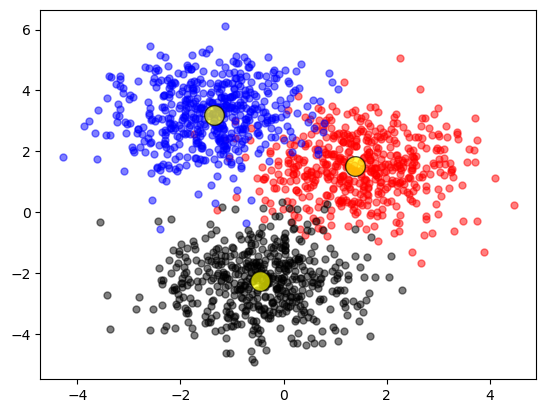

In [12]:
plt.scatter(x0,y0, marker='.', c='red', s=100, alpha=0.5)
plt.scatter(x1,y1, marker='.', c='blue', s=100, alpha=0.5)
plt.scatter(x2,y2, marker='.', c='black', s=100, alpha=0.5)
for cluster in cluster_centers:
    plt.scatter(cluster[0], cluster[1], s=200, marker='o', c='yellow', edgecolors= "black", alpha=0.7)
    print('cluster center:', cluster[0], cluster[1])

We can now see that we are now finding 3 clear centers, where the locations closely correspond with the centers we randomly distributed points around: (1.5,1.5), (-1.5, 3.25) and (-0.5, -2.25)

Visually, we see that the bulk of our values are roughly  +/- 2 around each center, and as such the initial value of ~2.4 is likely too large and thus causing the different clusters to appear connected. 

If we were to reduce the bandwidth from this value, the algorirthm would start identifying additional clusters. 

## DBSCAN

If our data had a higher density around the center-of-mass of each cluster, we could use the Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm, which tends to be quite a bit faster than MeanShift.  This type of algorithm would be particularly useful for phase separating systems (e.g., identifying which tails in a surfactant group together to form a micelle).

To use DBSCAN, will reinitialize our test data, now adjusting the standard deviation in our random generation of points to be more dense around the center point (this is adjusted via the sigma parameter defined below). 

Note, if you set sigma to 1.0, the data will be the same as we used before. 

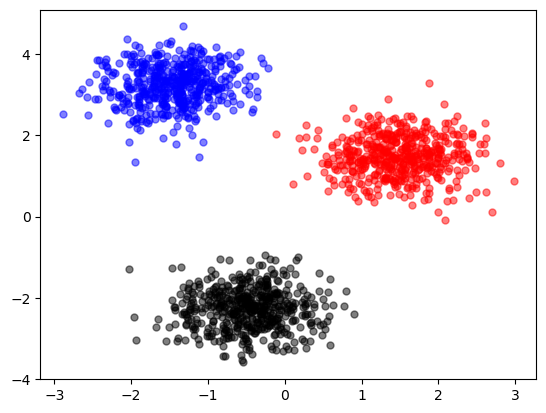

In [13]:
np.random.seed(123)

n_points = 500
sigma  = 0.5
x0 =  sigma*np.random.randn(n_points)+1.5
y0 =  sigma*np.random.randn(n_points)+1.5
labels_0 = np.full((n_points), 0, dtype=int)

x1 =  sigma*np.random.randn(n_points)-1.5
y1 =  sigma*np.random.randn(n_points)+3.25
labels_1 = np.full((n_points), 1, dtype=int)

x2 =  sigma*np.random.randn(n_points)-0.5
y2 =  sigma*np.random.randn(n_points)-2.25
labels_2 = np.full((n_points), 2, dtype=int)



x_all = np.concatenate((x0,x1,x2))
y_all = np.concatenate((y0,y1,y2))
labels_true = np.concatenate((labels_0, labels_1, labels_2))

xy = np.stack((x_all,y_all),axis=1)
xy.shape

plt.scatter(x0,y0, marker='.', c='red', s=100, alpha=0.5)
plt.scatter(x1,y1, marker='.', c='blue', s=100, alpha=0.5)
plt.scatter(x2,y2, marker='.', c='black', s=100, alpha=0.5)

In [14]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

db = DBSCAN(eps=0.25, min_samples=10).fit(xy)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)

Estimated number of clusters: 3
Estimated number of noise points: 74


Note about parsing the information from dbscan.  'db.labels_' is a numpy array where each entry corresponds to an associated point xy.  In this algorithm, not all points will necessarily end up in one of the clusters; these unaffiliated points are given a label of -1 in 'db.labels_'.  Hence, when we calculate n_clusters, above, we need to subtract 1 if -1 appears in our set of labels.  These are considered "noise points."

The DBSCAN example [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py) shows using some of the various metrics in scikit to see how well the clustering did, since in this case we know which cluster the points should be associated with. 

The homogeneity_score and completeness_score both are quite useful.

For homogeneity, when all samples in cluster identified by DBSCAN have the same "true" label, the homogeneity equals 1. This doesn't test if we got ALL of the points in the cluster, just that the ones we did identify should be there. Below, we can see that almost all points have been correctly assigned (this ranges from 0 to 1, with 1 being perfect).


In [15]:
metrics.homogeneity_score(labels_true, labels)

0.950772100732874

For completeness, when all samples of with "true" label (c) have been assigned to the same cluster (k), the completeness equals 1.  Here we have done a pretty good job, albeit not perfect, job of correctly clustering.  Recall, with the cutoffs we used, we had ~75 points that were labeled as -1 (i.e., not part of a cluster). This score's value is more reflective of the number of "noise" points.

In [16]:
metrics.completeness_score(labels_true, labels)

0.8417141795329606

Just as in the MeanShift, the input values to this algorithm can influence the number of clusters identified. The value of eps=0.25 I used initially is actually likely too small.   eps is defined as:

The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

With such a small value, we definitely will not capture the points that are on the fridges of the point centers. Increasing to 0.5 still provides us with 3 clusters, but now only 4 noise particles, and as a result the completeness scores increase substantially.

In [17]:
db = DBSCAN(eps=0.5, min_samples=10).fit(xy)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)

Estimated number of clusters: 3
Estimated number of noise points: 4


In [18]:
print("homogeneity: ", metrics.homogeneity_score(labels_true, labels))
print("completeness: ", metrics.completeness_score(labels_true, labels))

homogeneity:  0.9974762809857137
completeness:  0.9835652768733432


Setting eps to 0.6, we find 3 clusters and no noise particles, with homogeneity and completeness scores of 1.0.  

In [19]:
db = DBSCAN(eps=0.6, min_samples=10).fit(xy)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)
print("homogeneity: ", metrics.homogeneity_score(labels_true, labels))
print("completeness: ", metrics.completeness_score(labels_true, labels))

Estimated number of clusters: 3
Estimated number of noise points: 0
homogeneity:  1.0
completeness:  1.0


How do the centers-of-mass compare to the ideal centers we randomly generated numbers around (1.5,1.5), (-1.5, 3.25) and (-0.5, -2.25)?  As close as to be expected, which we can also observe visually in the plot below.

0 1.4806780132433945 1.4797578506758133
1 -1.4701929614935962 3.2285821288894696
2 -0.4776167181400226 -2.262030191482949


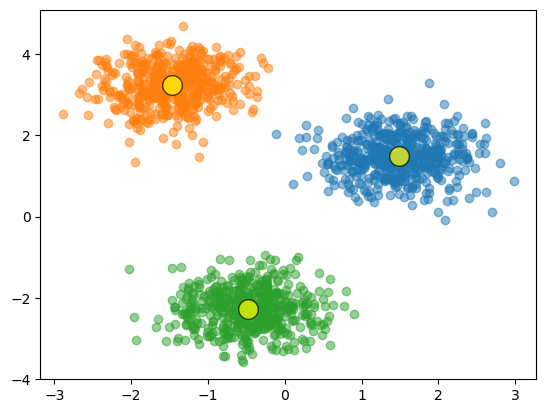

In [20]:
for i in set(labels):
    a = np.array([list(xy[j]) for j, label in enumerate(labels) if label==i])
    #print((a[:,0]))
    plt.scatter(a[:,0], a[:,1], alpha=0.5)
    if i !=-1:
        plt.scatter(a[:,0].mean(),a[:,1].mean(), s=200, marker='o', c='yellow', edgecolors= "black", alpha=0.7)
    print(i, a[:,0].mean(),a[:,1].mean())

However, increasing again to 0.7 results in only 2 clusters being identify, as the larger distance now allows separate clusters to effectively "link" together.  So unless the clusters are well distance, it may be preferrable to exclude those points on the fringes than risk merging clusters together. 

Given that we are now merging two of the clusters together with eps=0.7, the homogeneity score drops substantially.  This is because we are now mis-identifying a large portion of our system.

Completeness stays at 1.0, because it isn't necessarily measuring if they are in the correct cluster, just that all points with the same cluster "true" label are in the same cluster. 

In [21]:
db = DBSCAN(eps=0.7, min_samples=10).fit(xy)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)
print("homogeneity: ", metrics.homogeneity_score(labels_true, labels))
print("completeness: ", metrics.completeness_score(labels_true, labels))

Estimated number of clusters: 2
Estimated number of noise points: 0
homogeneity:  0.579380164285695
completeness:  1.0


### Side note on validation metrics: 

In past work to identify the center-of-mass of micelles and identify which molecules are in said micelles (e.g., see: https://www.pnas.org/doi/abs/10.1073/pnas.1019763108), I used a variant of the Crocker and Grier [approach](https://physics.emory.edu/faculty/weeks/idl/) developed for colloid particle identification and tracking.  

Briefly, the xyz position of the point particles of interest (e.g., in the case above, the aggregating tails) were placed into a 3d voxel array.  A Guassian convolution was then applied to the voxel array, and the cells with the highest convoluted values were identified; these "brightest" points are then considered to be the center-of-mass of the clusters (in my case micelles). From the centroids a simple distance based calculation could be then used to identify molecules with particles near each identified center-of-mass. 

In the paper linked above, we found that the spherical micelles weren't always spherical, which ended up being an important aspect as to why we were observing quasicrystals in these systems.  

![asphericity](https://www.pnas.org/cms/10.1073/pnas.1019763108/asset/01a32c9f-4e40-463e-ae25-60345065b548/assets/graphic/pnas.1019763108fig3.jpeg)

Beyond the metrics mentioned above, when trying to cluster physical data (i.e., things that represent point particles in space) it is generally good to calculate a mass distribution such as radius of gyration tensor or asphericity parameter, to validate the clustering.  If you know your system should be all spheres, getting highly aspherical clusters likely means you've set your parameters incorrectly (or in the case I showed above, that there is interesting behavior afoot).   

## K-means clustering

K-means clustering is a little different in that we specify the number of clusters we want.  K-means iteratively optimizes the position of the cluster centroids. We use this approach to transition from our atomistic water to a coarse-grained representation that groups 4 atomistic waters into a single CG water bead. 

Let us do a simple example where we use the same basic generation of random points as above, but we limit to a small number (in this case 12) for each cluster.

In [39]:
from sklearn.cluster import KMeans

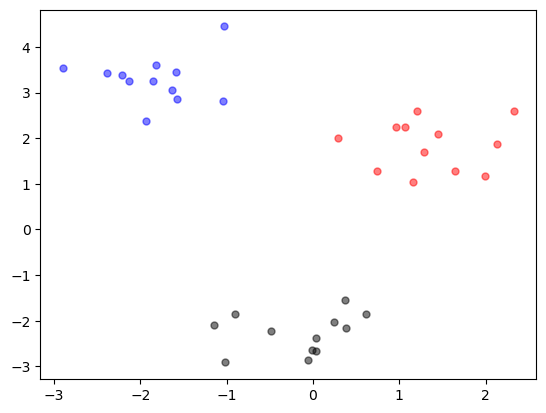

In [40]:
np.random.seed(123)

n_points = 12
sigma  = 0.5
x0 =  sigma*np.random.randn(n_points)+1.5
y0 =  sigma*np.random.randn(n_points)+1.5
labels_0 = np.full((n_points), 0, dtype=int)

x1 =  sigma*np.random.randn(n_points)-1.5
y1 =  sigma*np.random.randn(n_points)+3.25
labels_1 = np.full((n_points), 1, dtype=int)

x2 =  sigma*np.random.randn(n_points)-0.5
y2 =  sigma*np.random.randn(n_points)-2.25
labels_2 = np.full((n_points), 2, dtype=int)



x_all = np.concatenate((x0,x1,x2))
y_all = np.concatenate((y0,y1,y2))
labels_true = np.concatenate((labels_0, labels_1, labels_2))

xy = np.stack((x_all,y_all),axis=1)
xy.shape

plt.scatter(x0,y0, marker='.', c='red', s=100, alpha=0.5)
plt.scatter(x1,y1, marker='.', c='blue', s=100, alpha=0.5)
plt.scatter(x2,y2, marker='.', c='black', s=100, alpha=0.5)

In [41]:
km = KMeans(n_clusters=3, init='k-means++').fit(xy)

/Users/cri/miniforge3/envs/revmap/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
labels = km.labels_

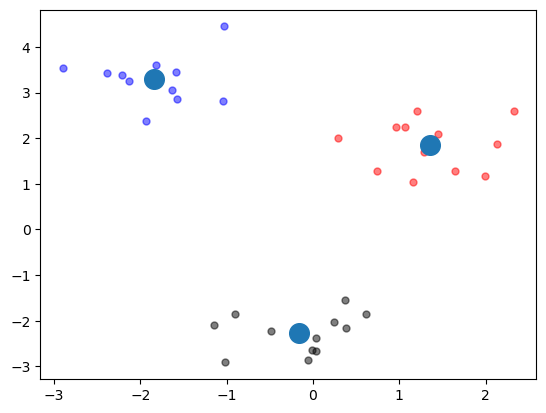

In [43]:
plt.scatter(x0,y0, marker='.', c='red', s=100, alpha=0.5)
plt.scatter(x1,y1, marker='.', c='blue', s=100, alpha=0.5)
plt.scatter(x2,y2, marker='.', c='black', s=100, alpha=0.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200)

In [44]:
print("homogeneity: ", metrics.homogeneity_score(labels_true, labels))
print("completeness: ", metrics.completeness_score(labels_true, labels))

homogeneity:  1.0
completeness:  1.0


For something a bit more akin to the water model, we can just generate some random points in a box 2d box and then determine the centroids if we map 4 to 1. 

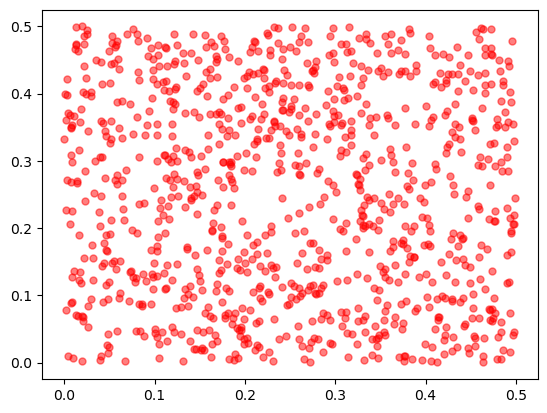

In [53]:
np.random.seed(123)

n_points = 1000
sigma  = 0.5
x0 =  sigma*np.random.rand(n_points)
y0 =  sigma*np.random.rand(n_points)
labels_0 = np.full((n_points), 0, dtype=int)
plt.scatter(x0,y0, marker='.', c='red', s=100, alpha=0.5)

xy = np.stack((x0,y0),axis=1)



In [56]:
km = KMeans(n_clusters=250, init='k-means++').fit(xy)

/Users/cri/miniforge3/envs/revmap/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


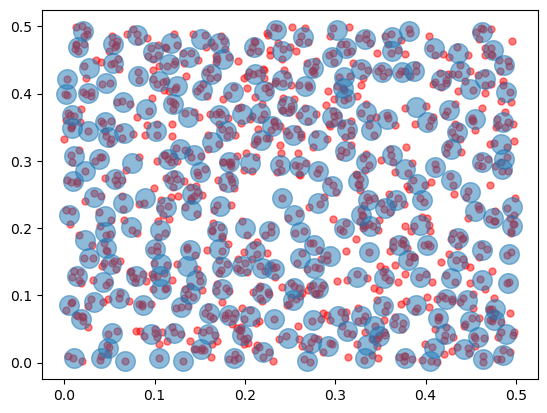

In [58]:
plt.scatter(x0,y0, marker='.', c='red', s=100, alpha=0.5)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200, alpha=0.5)